# Hunger Suppression AI Agent


This project is designed to reduce food waste and feed hungry people by efficiently matching food donors (feeders) with people in need (hungry individuals). It is developed using a microservices architecture to ensure scalability, flexibility, and easy maintenance.

* How It Works?

* Food Donors (Feeders): People or businesses (like restaurants, hotels, or homes) who have excess food can register and specify the food type, quantity, and location.
* Hungry Individuals (Seekers): Those in need can register their location and request food.
* AI-Based Matching System:
* Uses Machine Learning (ML) to predict hunger severity based on location, food availability, and past data.
* Ensures that food reaches the most needy people first.


* Real-Time Mapping (Google Maps/Folium):
* Displays feeder and seeker locations on a map.
* Optimizes food delivery routes.

* Chatbot Integration:
* Helps users find food, register, and communicate with donors.(
* Microservices Architecture:
Divides the system into smaller, independent services (food matching, chat, maps, ML).
* Each service can be scaled separately to handle high demand.

* Secure & Scalable:
* Hosted on Azure/AWS cloud.
* Uses databases (SQL/NoSQL) for efficient data storage.

In [2]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

* What Problem Does It Solve?
* Food Wastage: Prevents food from being thrown away.
* Hunger Reduction: Directs food to those who need it the most.
* Efficient Distribution: Matches food donors with hungry people instantly.

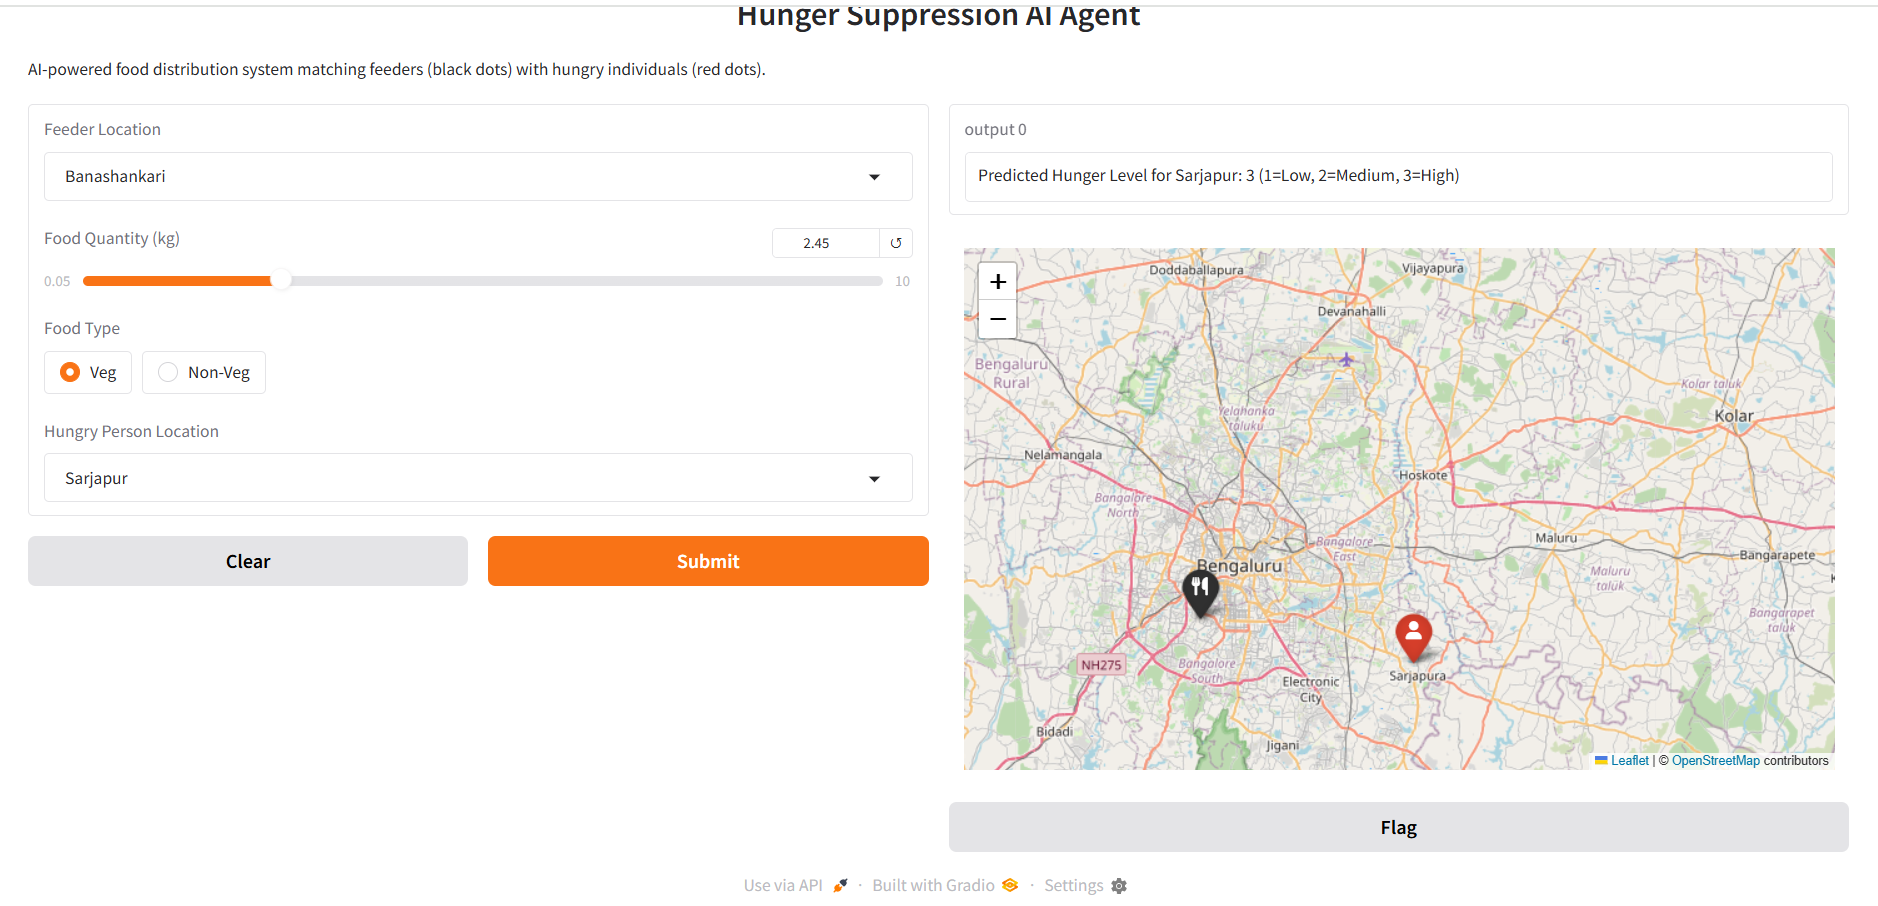

In [3]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample Dataset (Simulated for Matching Red & Green Dots)
data = {
    'Feeder_Location': ['Banashankari', 'Whitefield', 'Electronic City', 'HSR Layout', 'Koramangala', 'Kodathi', 'Sarjapur'],
    'Food_Quantity': [round(x, 3) for x in np.linspace(0.05, 10, num=7)],  # Ensuring same length
    'Food_Type': ['Veg', 'Non-Veg', 'Veg', 'Veg', 'Non-Veg', 'Veg', 'Non-Veg'],
    'Hungry_Location': ['Banashankari', 'Whitefield', 'Electronic City', 'HSR Layout', 'Koramangala', 'Kodathi', 'Sarjapur'],
    'Hunger_Level': [1, 2, 3, 2, 1, 3, 2]  # Ensuring same length
}

# Creating DataFrame
df = pd.DataFrame(data)

# Encoding categorical values
df['Food_Type'] = df['Food_Type'].map({'Veg': 0, 'Non-Veg': 1})

# Convert categorical locations to numerical codes
df['Feeder_Location'] = df['Feeder_Location'].astype('category')
df['Hungry_Location'] = df['Hungry_Location'].astype('category')

# Save categories for later use
feeder_categories = dict(enumerate(df['Feeder_Location'].cat.categories))
hungry_categories = dict(enumerate(df['Hungry_Location'].cat.categories))

df['Feeder_Location'] = df['Feeder_Location'].cat.codes
df['Hungry_Location'] = df['Hungry_Location'].cat.codes

# Splitting the dataset
X = df[['Feeder_Location', 'Food_Quantity', 'Food_Type', 'Hungry_Location']].copy()
y = df['Hunger_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Machine Learning Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Function to match food distribution
def match_food(feeder_loc, food_qty, food_type, hungry_loc):
    try:
        # Convert inputs to model-compatible format
        if feeder_loc in feeder_categories.values():
            feeder_loc_code = {v: k for k, v in feeder_categories.items()}[feeder_loc]
        else:
            return f"Error: Feeder location '{feeder_loc}' not recognized."

        if hungry_loc in hungry_categories.values():
            hungry_loc_code = {v: k for k, v in hungry_categories.items()}[hungry_loc]
        else:
            return f"Error: Hungry location '{hungry_loc}' not recognized."

        food_type_code = 0 if food_type.lower() == 'veg' else 1

        # Predict Hunger Level
        pred_hunger = model.predict([[feeder_loc_code, food_qty, food_type_code, hungry_loc_code]])[0]

        return f"Predicted Hunger Level for {hungry_loc}: {pred_hunger} (1=Low, 2=Medium, 3=High)"

    except Exception as e:
        return f"Error: {str(e)}"

# Gradio UI
demo = gr.Interface(
    fn=match_food,
    inputs=[
        gr.Dropdown(choices=list(feeder_categories.values()), label="Feeder Location"),
        gr.Slider(0.05, 10, step=0.1, label="Food Quantity (kg)"),
        gr.Radio(choices=['Veg', 'Non-Veg'], label="Food Type"),
        gr.Dropdown(choices=list(hungry_categories.values()), label="Hungry Person Location")
    ],
    outputs="text",
    title="Hunger Suppression AI Agent",
    description="AI-powered food distribution system matching feeders (green dots) with hungry individuals (red dots)."
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dc743ee29d361a6096.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


* This system can revolutionize global food distribution and help in achieving zero hunger by utilizing AI and technology-driven solutions.

In [4]:
import gradio as gr
import pandas as pd
import numpy as np
import folium
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from folium.plugins import MarkerCluster

# Sample Dataset with GPS Coordinates
data = {
    'Feeder_Location': ['Banashankari', 'Whitefield', 'Electronic City', 'HSR Layout', 'Koramangala', 'Kodathi', 'Sarjapur'],
    'Food_Quantity': [round(x, 3) for x in np.linspace(0.05, 10, num=7)],
    'Food_Type': ['Veg', 'Non-Veg', 'Veg', 'Veg', 'Non-Veg', 'Veg', 'Non-Veg'],
    'Hungry_Location': ['Banashankari', 'Whitefield', 'Electronic City', 'HSR Layout', 'Koramangala', 'Kodathi', 'Sarjapur'],
    'Hunger_Level': [1, 2, 3, 2, 1, 3, 2],
    'Feeder_Coordinates': [(12.9204, 77.5463), (12.9716, 77.7500), (12.8452, 77.6602), (12.9121, 77.6387), (12.9343, 77.6269), (12.8801, 77.6906), (12.8731, 77.7803)],
    'Hungry_Coordinates': [(12.9204, 77.5463), (12.9716, 77.7500), (12.8452, 77.6602), (12.9121, 77.6387), (12.9343, 77.6269), (12.8801, 77.6906), (12.8731, 77.7803)]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Encoding categorical values
df['Food_Type'] = df['Food_Type'].map({'Veg': 0, 'Non-Veg': 1})

# Convert categorical locations to numerical codes
df['Feeder_Location'] = df['Feeder_Location'].astype('category')
df['Hungry_Location'] = df['Hungry_Location'].astype('category')

# Save categories for later use
feeder_categories = dict(enumerate(df['Feeder_Location'].cat.categories))
hungry_categories = dict(enumerate(df['Hungry_Location'].cat.categories))

df['Feeder_Location'] = df['Feeder_Location'].cat.codes
df['Hungry_Location'] = df['Hungry_Location'].cat.codes

# Splitting the dataset
X = df[['Feeder_Location', 'Food_Quantity', 'Food_Type', 'Hungry_Location']].copy()
y = df['Hunger_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Machine Learning Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Function to match food distribution & show map
def match_food(feeder_loc, food_qty, food_type, hungry_loc):
    try:
        # Convert inputs to model-compatible format
        if feeder_loc in feeder_categories.values():
            feeder_loc_code = {v: k for k, v in feeder_categories.items()}[feeder_loc]
        else:
            return f"Error: Feeder location '{feeder_loc}' not recognized.", None

        if hungry_loc in hungry_categories.values():
            hungry_loc_code = {v: k for k, v in hungry_categories.items()}[hungry_loc]
        else:
            return f"Error: Hungry location '{hungry_loc}' not recognized.", None

        food_type_code = 0 if food_type.lower() == 'veg' else 1

        # Predict Hunger Level
        pred_hunger = model.predict([[feeder_loc_code, food_qty, food_type_code, hungry_loc_code]])[0]

        # Find coordinates for map
        feeder_coords = df.loc[df['Feeder_Location'] == feeder_loc_code, 'Feeder_Coordinates'].values[0]
        hungry_coords = df.loc[df['Hungry_Location'] == hungry_loc_code, 'Hungry_Coordinates'].values[0]

        # Create Map
        hunger_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)  # Centered around Bangalore

        # Add Feeder (Black Dot)
        folium.Marker(
            location=feeder_coords,
            popup=f"Feeder: {feeder_loc}",
            icon=folium.Icon(color='black', icon='cutlery', prefix='fa')
        ).add_to(hunger_map)

        # Add Hungry Person (Red Dot)
        folium.Marker(
            location=hungry_coords,
            popup=f"Hungry Person: {hungry_loc}",
            icon=folium.Icon(color='red', icon='user', prefix='fa')
        ).add_to(hunger_map)

        return f"Predicted Hunger Level for {hungry_loc}: {pred_hunger} (1=Low, 2=Medium, 3=High)", hunger_map._repr_html_()

    except Exception as e:
        return f"Error: {str(e)}", None

# Gradio UI
demo = gr.Interface(
    fn=match_food,
    inputs=[
        gr.Dropdown(choices=list(feeder_categories.values()), label="Feeder Location"),
        gr.Slider(0.05, 10, step=0.1, label="Food Quantity (kg)"),
        gr.Radio(choices=['Veg', 'Non-Veg'], label="Food Type"),
        gr.Dropdown(choices=list(hungry_categories.values()), label="Hungry Person Location")
    ],
    outputs=["text", gr.HTML()],
    title="Hunger Suppression AI Agent",
    description="AI-powered food distribution system matching feeders (black dots) with hungry individuals (red dots)."
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://807e40ed6877e6618b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


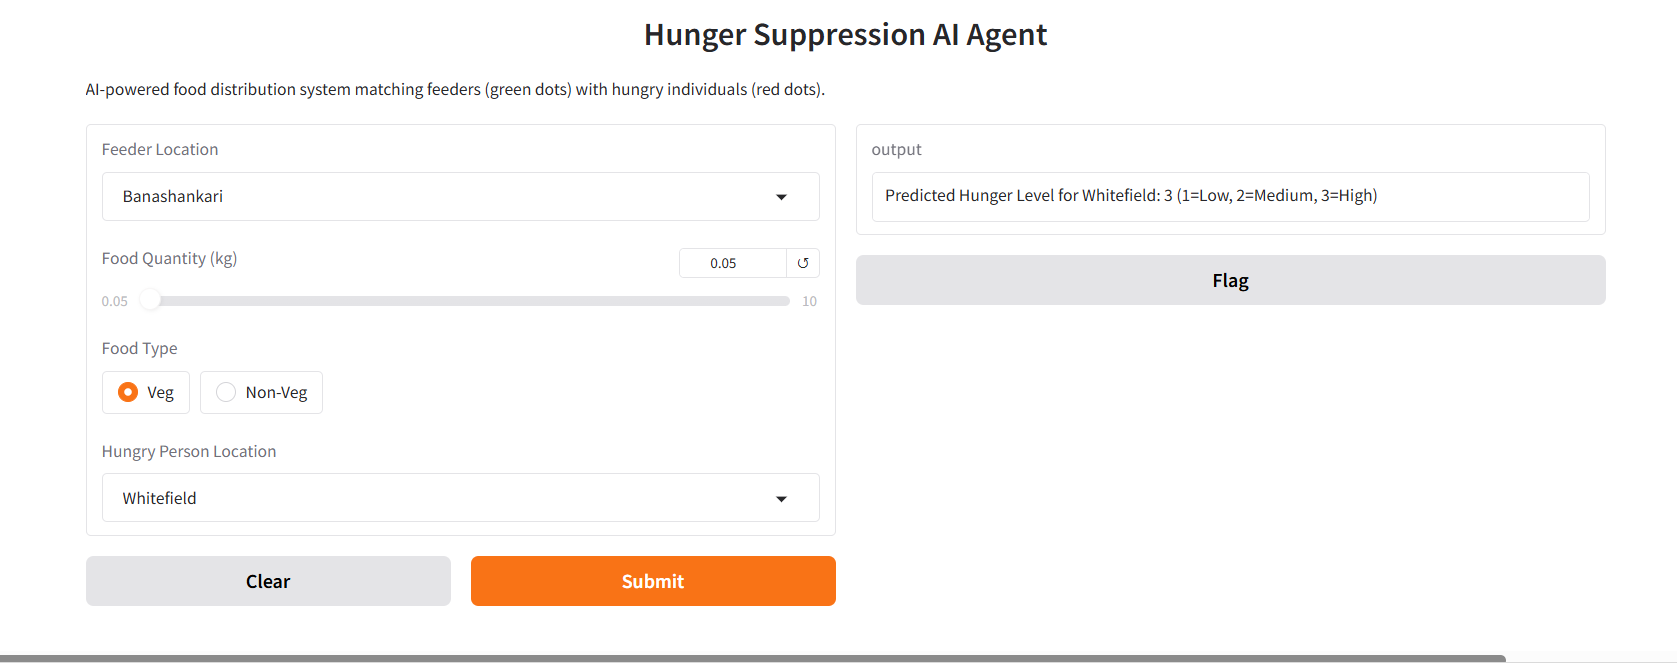

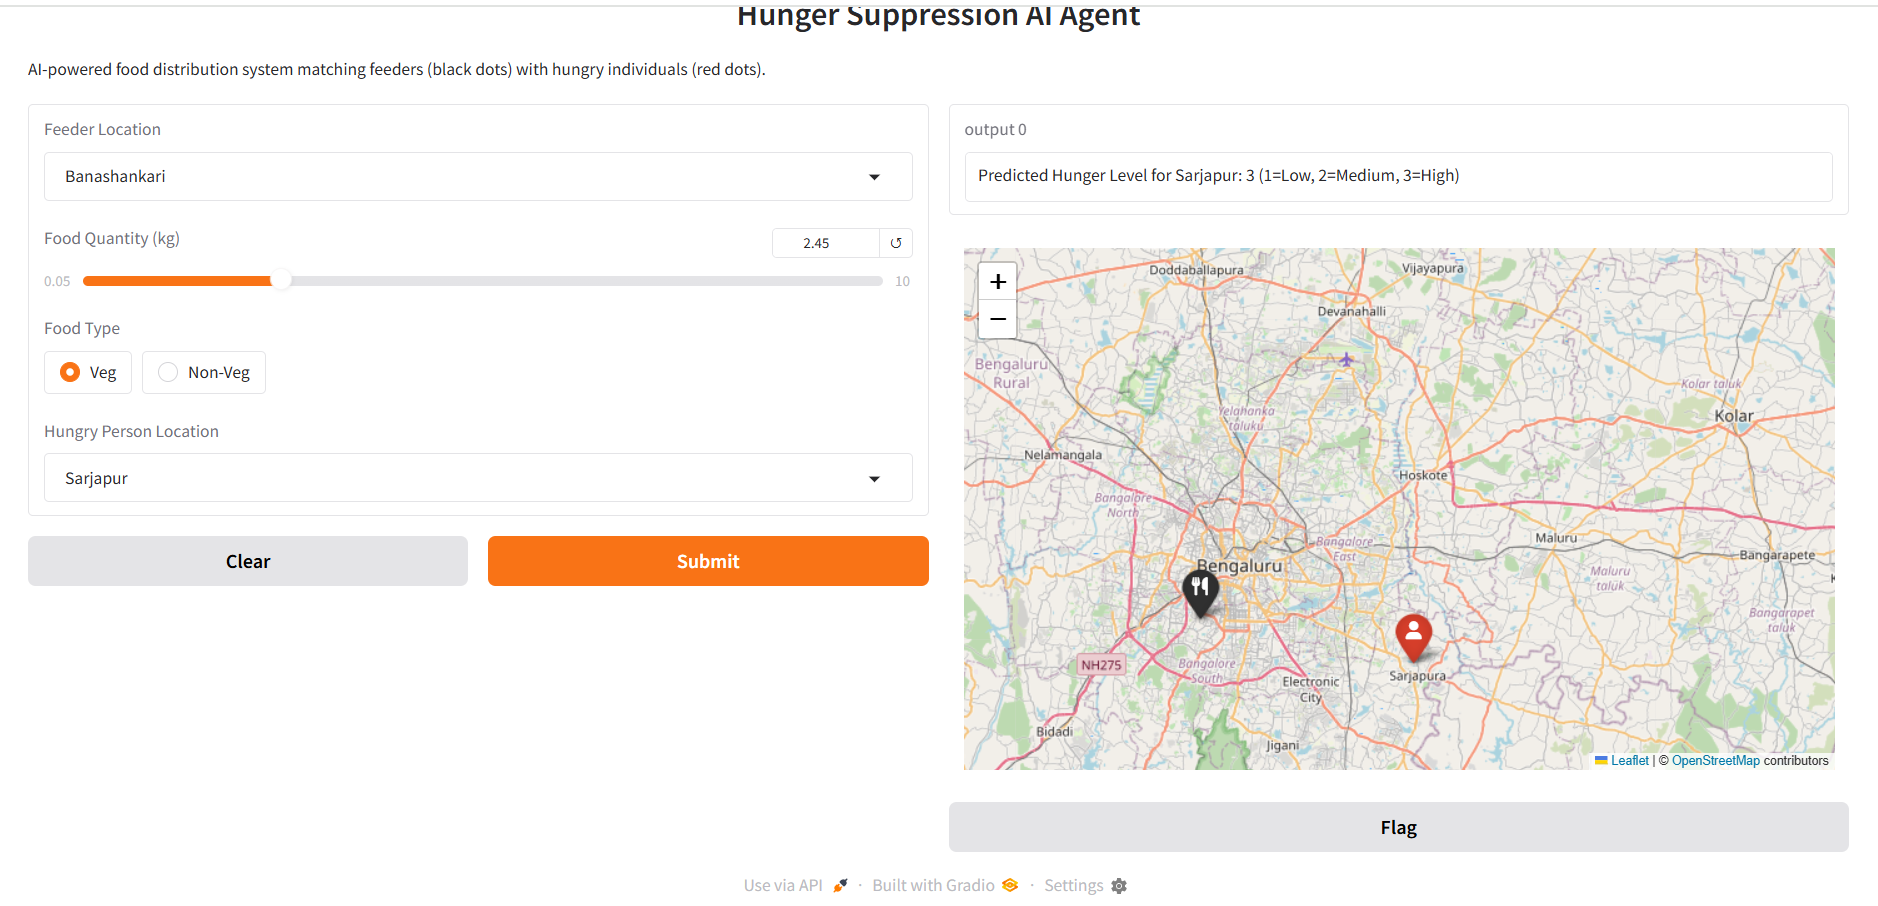

In [7]:
import gradio as gr
import pandas as pd
import numpy as np
import folium
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from folium.plugins import MarkerCluster

# Sample Dataset with GPS Coordinates
data = {
    'Feeder_Location': ['Banashankari', 'Whitefield', 'Electronic City', 'HSR Layout', 'Koramangala', 'Kodathi', 'Sarjapur'],
    'Food_Quantity': [round(x, 3) for x in np.linspace(0.05, 10, num=7)],
    'Food_Type': ['Veg', 'Non-Veg', 'Veg', 'Veg', 'Non-Veg', 'Veg', 'Non-Veg'],
    'Hungry_Location': ['Banashankari', 'Whitefield', 'Electronic City', 'HSR Layout', 'Koramangala', 'Kodathi', 'Sarjapur'],
    'Hunger_Level': [1, 2, 3, 2, 1, 3, 2],
    'Feeder_Coordinates': [(12.9204, 77.5463), (12.9716, 77.7500), (12.8452, 77.6602), (12.9121, 77.6387), (12.9343, 77.6269), (12.8801, 77.6906), (12.8731, 77.7803)],
    'Hungry_Coordinates': [(12.9204, 77.5463), (12.9716, 77.7500), (12.8452, 77.6602), (12.9121, 77.6387), (12.9343, 77.6269), (12.8801, 77.6906), (12.8731, 77.7803)]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Encoding categorical values
df['Food_Type'] = df['Food_Type'].map({'Veg': 0, 'Non-Veg': 1})

# Convert categorical locations to numerical codes
df['Feeder_Location'] = df['Feeder_Location'].astype('category')
df['Hungry_Location'] = df['Hungry_Location'].astype('category')

# Save categories for later use
feeder_categories = dict(enumerate(df['Feeder_Location'].cat.categories))
hungry_categories = dict(enumerate(df['Hungry_Location'].cat.categories))

df['Feeder_Location'] = df['Feeder_Location'].cat.codes
df['Hungry_Location'] = df['Hungry_Location'].cat.codes

# Splitting the dataset
X = df[['Feeder_Location', 'Food_Quantity', 'Food_Type', 'Hungry_Location']].copy()
y = df['Hunger_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Machine Learning Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Function to match food distribution & show map
def match_food(feeder_loc, food_qty, food_type, hungry_loc):
    try:
        # Convert inputs to model-compatible format
        if feeder_loc in feeder_categories.values():
            feeder_loc_code = {v: k for k, v in feeder_categories.items()}[feeder_loc]
        else:
            return f"Error: Feeder location '{feeder_loc}' not recognized.", None

        if hungry_loc in hungry_categories.values():
            hungry_loc_code = {v: k for k, v in hungry_categories.items()}[hungry_loc]
        else:
            return f"Error: Hungry location '{hungry_loc}' not recognized.", None

        food_type_code = 0 if food_type.lower() == 'veg' else 1

        # Predict Hunger Level
        pred_hunger = model.predict([[feeder_loc_code, food_qty, food_type_code, hungry_loc_code]])[0]

        # Find coordinates for map
        feeder_coords = df.loc[df['Feeder_Location'] == feeder_loc_code, 'Feeder_Coordinates'].values[0]
        hungry_coords = df.loc[df['Hungry_Location'] == hungry_loc_code, 'Hungry_Coordinates'].values[0]

        # Create Map
        hunger_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)  # Centered around Bangalore

        # Add Feeder (green Dot)
        folium.Marker(
            location=feeder_coords,
            popup=f"Feeder: {feeder_loc}",
            icon=folium.Icon(color='green', icon='cutlery', prefix='fa')
        ).add_to(hunger_map)

        # Add Hungry Person (Red Dot)
        folium.Marker(
            location=hungry_coords,
            popup=f"Hungry Person: {hungry_loc}",
            icon=folium.Icon(color='red', icon='user', prefix='fa')
        ).add_to(hunger_map)

        return f"Predicted Hunger Level for {hungry_loc}: {pred_hunger} (1=Low, 2=Medium, 3=High)", hunger_map._repr_html_()

    except Exception as e:
        return f"Error: {str(e)}", None

# Gradio UI
demo = gr.Interface(
    fn=match_food,
    inputs=[
        gr.Dropdown(choices=list(feeder_categories.values()), label="Feeder Location"),
        gr.Slider(0.05, 10, step=0.1, label="Food Quantity (kg)"),
        gr.Radio(choices=['Veg', 'Non-Veg'], label="Food Type"),
        gr.Dropdown(choices=list(hungry_categories.values()), label="Hungry Person Location")
    ],
    outputs=["text", gr.HTML()],
    title="Hunger Suppression AI Agent",
    description="AI-powered food distribution system matching feeders (black dots) with hungry individuals (red dots).",
    live=True,
    allow_flagging="never"
)

demo.launch(share=True)


/usr/local/lib/python3.11/dist-packages/gradio/interface.py:403: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0aad5369073f24fd94.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [9]:
import gradio as gr
import pandas as pd
import numpy as np
import folium
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from folium.plugins import MarkerCluster

# Sample Dataset with GPS Coordinates
data = {
    'Feeder_Location': ['Banashankari', 'Whitefield', 'Electronic City', 'HSR Layout', 'Koramangala', 'Kodathi', 'Sarjapur'],
    'Food_Quantity': [round(x, 3) for x in np.linspace(0.05, 10, num=7)],
    'Food_Type': ['Veg', 'Non-Veg', 'Veg', 'Veg', 'Non-Veg', 'Veg', 'Non-Veg'],
    'Hungry_Location': ['Banashankari', 'Whitefield', 'Electronic City', 'HSR Layout', 'Koramangala', 'Kodathi', 'Sarjapur'],
    'Hunger_Level': [1, 2, 3, 2, 1, 3, 2],
    'Feeder_Coordinates': [(12.9204, 77.5463), (12.9716, 77.7500), (12.8452, 77.6602), (12.9121, 77.6387), (12.9343, 77.6269), (12.8801, 77.6906), (12.8731, 77.7803)],
    'Hungry_Coordinates': [(12.9204, 77.5463), (12.9716, 77.7500), (12.8452, 77.6602), (12.9121, 77.6387), (12.9343, 77.6269), (12.8801, 77.6906), (12.8731, 77.7803)]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Encoding categorical values
df['Food_Type'] = df['Food_Type'].map({'Veg': 0, 'Non-Veg': 1})

# Convert categorical locations to numerical codes
df['Feeder_Location'] = df['Feeder_Location'].astype('category')
df['Hungry_Location'] = df['Hungry_Location'].astype('category')

# Save categories for later use
feeder_categories = dict(enumerate(df['Feeder_Location'].cat.categories))
hungry_categories = dict(enumerate(df['Hungry_Location'].cat.categories))

df['Feeder_Location'] = df['Feeder_Location'].cat.codes
df['Hungry_Location'] = df['Hungry_Location'].cat.codes

# Splitting the dataset
X = df[['Feeder_Location', 'Food_Quantity', 'Food_Type', 'Hungry_Location']].copy()
y = df['Hunger_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Machine Learning Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Function to match food distribution & show map
def match_food(feeder_loc, food_qty, food_type, hungry_loc):
    try:
        # Convert inputs to model-compatible format
        if feeder_loc in feeder_categories.values():
            feeder_loc_code = {v: k for k, v in feeder_categories.items()}[feeder_loc]
        else:
            return f"Error: Feeder location '{feeder_loc}' not recognized.", None

        if hungry_loc in hungry_categories.values():
            hungry_loc_code = {v: k for k, v in hungry_categories.items()}[hungry_loc]
        else:
            return f"Error: Hungry location '{hungry_loc}' not recognized.", None

        food_type_code = 0 if food_type.lower() == 'veg' else 1

        # Predict Hunger Level
        pred_hunger = model.predict([[feeder_loc_code, food_qty, food_type_code, hungry_loc_code]])[0]

        # Find coordinates for map
        feeder_coords = df.loc[df['Feeder_Location'] == feeder_loc_code, 'Feeder_Coordinates'].values[0]
        hungry_coords = df.loc[df['Hungry_Location'] == hungry_loc_code, 'Hungry_Coordinates'].values[0]

        # Create Map
        hunger_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)  # Centered around Bangalore

        # Add Feeder (green Dot)
        folium.Marker(
            location=feeder_coords,
            popup=f"Feeder: {feeder_loc}",
            icon=folium.Icon(color='green', icon='cutlery', prefix='fa')
        ).add_to(hunger_map)

        # Add Hungry Person (Red Dot)
        folium.Marker(
            location=hungry_coords,
            popup=f"Hungry Person: {hungry_loc}",
            icon=folium.Icon(color='red', icon='user', prefix='fa')
        ).add_to(hunger_map)

        return f"Predicted Hunger Level for {hungry_loc}: {pred_hunger} (1=Low, 2=Medium, 3=High)", hunger_map._repr_html_()

    except Exception as e:
        return f"Error: {str(e)}", None

# Gradio UI with Chat
with gr.Blocks() as demo:
    gr.Markdown("# Hunger Suppression AI Agent")
    chatbot = gr.Chatbot()

    with gr.Row():
        feeder_loc = gr.Dropdown(choices=list(feeder_categories.values()), label="Feeder Location")
        food_qty = gr.Slider(0.05, 10, step=0.1, label="Food Quantity (kg)")
        food_type = gr.Radio(choices=['Veg', 'Non-Veg'], label="Food Type")
        hungry_loc = gr.Dropdown(choices=list(hungry_categories.values()), label="Hungry Person Location")

    submit = gr.Button("Match Food")
    output_text = gr.Textbox()
    output_html = gr.HTML()

    submit.click(match_food, inputs=[feeder_loc, food_qty, food_type, hungry_loc], outputs=[output_text, output_html])

demo.launch(share=True)

<ipython-input-9-8559f4652f7a>:96: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b28656fe8415906aa7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
